# Supervised Logistic Regreesion Analysis

## Instructions

Make sure that "kat_data_similar_songs.csv" is stored in the directory "data/kat_data_similar_songs.csv".

In [1]:
import pandas as pd
import numpy as np
import lr_model as lr
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

NUM_FEATURES = 10000
NUM_ITERATIONS = 300
LEARNING_RATE = 0.1

In [2]:
#load the data, tuples
my_data_similar_df = pd.read_csv("data/kat_data_similar.csv") 
print(len( my_data_similar_df))

#Grab the lyrics and the corresponding similar song title
similar_lyrics, song_title = my_data_similar_df["lyrics"].tolist(), my_data_similar_df['title'].tolist()


7047


In [3]:
len(set(song_title))

614

In [4]:
#Process lyrics, lemmatize and remove stop words
processed_lyrics = []
for lyric in similar_lyrics:
    processed_lyrics.append(lr.preprocess_sentence(lyric))

In [5]:
# Vectorize the data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=NUM_FEATURES)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_lyrics)
tfidf_matrix = tfidf_matrix.toarray()


In [6]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_matrix)

In [7]:
X_train, X_test, y_train, y_test = [], [], [], []

In [8]:
#Split training and testing data

for i in range(0, len(similar_lyrics), 10):  
    X_train_chunk = X_scaled[i:i+8]  # Select 8 samples for training
    X_test_chunk = X_scaled[i+8:i+10]  # Select 2 sample for testing
    y_train_chunk = song_title[i:i+8]  # Corresponding labels for training
    y_test_chunk = song_title[i+8:i+10]  # Corresponding label for testing
    
    # Append chunks to total lists
    X_train.append(X_train_chunk)
    X_test.append(X_test_chunk)
    y_train.append(y_train_chunk)
    y_test.append(y_test_chunk)

X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
y_train = np.hstack(y_train)
y_test = np.hstack(y_test)


In [9]:
print("Training set size:", X_train[:5])
print("labels for training set:", y_train[:5])
print("Testing set size:", X_test[:5])
print("labels for training set:", y_test[:5])


Training set size: [[-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]]
labels for training set: ['Cuéntale' 'Cuéntale' 'Cuéntale' 'Cuéntale' 'Cuéntale']
Testing set size: [[-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [ 3.25657129 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]
 [-0.17386512 -0.1044889  -0.0451613  ... -0.0183089  -0.02495614
  -0.02379465]]
labels for training set: ['Libertad' 'Libertad' 'Te He Querido, Te He

In [10]:
#Get shape and sparsity
print(tfidf_matrix.shape)
print(np.count_nonzero(tfidf_matrix[0])/len(tfidf_matrix[0])*100)

(7047, 10000)
0.6


In [11]:
#Use Logistic Regression from Homework
regression_model = lr.LogisticRegression(LEARNING_RATE,NUM_ITERATIONS)
start_time = time.time()
regression_model.train(X_train, y_train, True)
end_time = time.time()

print(f"time: {end_time - start_time}")

Training for 300 iterations
class mappings:  {'001': 0, '085 - Ao Vivo': 1, '1000 Oceans': 2, '11 PM': 3, '1st of Tha Month': 4, '23rd Street': 5, '3 Nights': 6, '3005': 7, '4Me 4Me': 8, '5 Letras': 9, "5 MO' MINUTES": 10, '505': 11, '777-666': 12, '8TEEN': 13, 'A Mí': 14, 'A Song For Mama': 15, 'A Ti No': 16, 'A Tu Merced': 17, 'ABALO EMOCIONAL - Ao Vivo': 18, 'ADMV': 19, 'ALIEN SUPERSTAR': 20, 'AMERIICAN REQUIEM': 21, 'Abusadora': 22, 'Across The Universe - Remastered 2009': 23, 'Add Up My Love': 24, 'Addicted': 25, 'Afraid': 26, 'After Hours': 27, "Age Ain't Nothing But a Number": 28, 'Agosto': 29, 'Ahora Es': 30, "Ain't No Rest For The Wicked - Original Version": 31, 'All My Life': 32, 'All Night': 33, 'Alocate': 34, 'Amarillo': 35, 'Ambitionz Az A Ridah': 36, 'American Idiot': 37, 'Amor Prohibido': 38, 'Angel in Disguise': 39, 'Angelina': 40, 'Angelito': 41, 'Another One Bites The Dust - Remastered 2011': 42, 'Another Way to Die': 43, 'Apocalypse': 44, 'Aqui Esta Tu Caldo': 45, 'A

In [18]:
#Test predicting funtion
output = regression_model.predict(X_test[0])
print(output)
print(y_test[0])


Libertad
Libertad


In [19]:
y_pred =[]

for test_plot in X_test:
  y_pred.append(regression_model.predict(test_plot))

print(f"Predicted Song Titles: {y_pred[:10]}")
print(f"Actual Song Titles: {y_test[:10]}")


a_score = accuracy_score(y_test, y_pred)
p_score = precision_score(y_test, y_pred, average='weighted')
r_score = recall_score(y_test, y_pred, average='weighted')
f_score = f1_score(y_test, y_pred, average='weighted')
#ocab_size = classifier.get_vocab_size()
print(f"accuracy score = {a_score}")
print(f"precision score = {p_score}")
print(f"recall score = {r_score}")
print(f"f1 score = {f_score}")


Predicted Song Titles: ['Libertad', 'Libertad', 'Te He Querido, Te He Llorado', 'Felina', 'Dile', 'Pepas', 'Baila Morena - Live', 'Pegao', 'Quiero Saber', "Llamé Pa' Verte (Bailando Sexy)"]
Actual Song Titles: ['Libertad' 'Libertad' 'Te He Querido, Te He Llorado'
 'Te He Querido, Te He Llorado' 'Quiero Bailar' 'Quiero Bailar'
 'Quiero Saber' 'Quiero Saber' 'Pegao' 'Pegao']
accuracy score = 0.20170454545454544
precision score = 0.16318601548172068
recall score = 0.20170454545454544
f1 score = 0.16898383071688278


/Users/0wner/Documents/Northeastern/Academic/S25/NLP/HW4/.conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/0wner/Documents/Northeastern/Academic/S25/NLP/HW4/.conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
y_pred =[]
predictions = []

for test_lyric in X_test:
  result = regression_model.predict(test_lyric)
  if result is None:
    print("None")
  if isinstance(result, tuple):
    label, prediction_value = result
    predictions.append(prediction_value)
    y_pred.append(label)
  else:
    y_pred.append(result)


In [30]:
print(len(y_pred))
print(len(y_test))

1408
1408


In [31]:
predictions_array = np.array(predictions)
print("predicted_labels shape:", predictions_array.shape)
print("y_test shape:", y_train.shape)
print("xtest shape:", y_test.shape)

predicted_labels shape: (0,)
y_test shape: (5639,)
xtest shape: (1408,)


In [32]:
print(f"Predicted Song Titles: {y_pred[:5]}")
print(f"Actual Song Titles: {y_test[:5]}")


Predicted Song Titles: ['Libertad', 'Libertad', 'Te He Querido, Te He Llorado', 'Felina', 'Dile']
Actual Song Titles: ['Libertad' 'Libertad' 'Te He Querido, Te He Llorado'
 'Te He Querido, Te He Llorado' 'Quiero Bailar']


### Evaluating Model

#### 1. Use a confusion matrix:
- checks how many mistakes model made for top 10 song labels


['Tití Me Preguntó', 'Propuesta Indecente', 'Gasolina', 'Yo Voy (feat. Daddy Yankee)', 'Yonaguni', 'Moscow Mule', 'Me Rehúso', 'Hasta el Amanecer', 'NI BIEN NI MAL', 'El Amante']


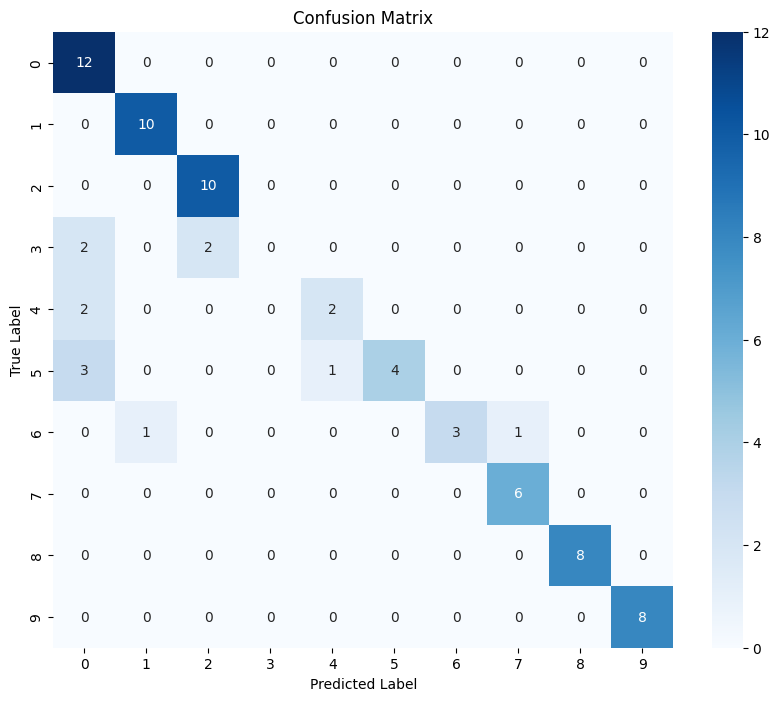

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from collections import Counter

# Extract top 20 most common labels
label_counts = Counter(y_test)
top_labels = [label for label, _ in label_counts.most_common(10)]  # adjust number as needed
print(top_labels)

cm = confusion_matrix(y_test, y_pred, labels=top_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# plt.savefig('plots/confusion_matrix_song+artist.png') 

<Figure size 640x480 with 0 Axes>

#### Use an example song
Example song: Salio El Sol by Don Omar   
Song Index: 301 in training data
Similar Song:


In [ ]:
#X = similar_song_Lyrics
#similar_song_title - Song Title

#Datapoint [0]
print(f"Original input song it should map too: {my_data_similar_df["title"][301]} by {my_data_similar_df["artist"][301]}")
print(f"Similar song we passed into model: {my_data_similar_df["similar_track"][301]}  by {my_data_similar_df["similar_artist"][301]}")
print(f"Predicted song title: {y_pred[301]}")
print(f"Actual? song title: {y_train[301]}")

Original input song it should map too: Dile by Don Omar
Similar song we passed into model: Salió el Sol  by Don Omar
Predicted song title: Hotel Room Service
Actual? song title: Guatauba


In [ ]:
print(regression_model.label_mapping)

{'001': 0, '085 - Ao Vivo': 1, '1000 Oceans': 2, '11 PM': 3, '1st of Tha Month': 4, '23rd Street': 5, '3 Nights': 6, '3005': 7, '4Me 4Me': 8, '5 Letras': 9, "5 MO' MINUTES": 10, '505': 11, '777-666': 12, '8TEEN': 13, 'A Mí': 14, 'A Song For Mama': 15, 'A Ti No': 16, 'A Tu Merced': 17, 'ABALO EMOCIONAL - Ao Vivo': 18, 'ADMV': 19, 'ALIEN SUPERSTAR': 20, 'AMERIICAN REQUIEM': 21, 'Abusadora': 22, 'Across The Universe - Remastered 2009': 23, 'Add Up My Love': 24, 'Addicted': 25, 'Afraid': 26, 'After Hours': 27, "Age Ain't Nothing But a Number": 28, 'Agosto': 29, 'Ahora Es': 30, "Ain't No Rest For The Wicked - Original Version": 31, 'All My Life': 32, 'All Night': 33, 'Alocate': 34, 'Amarillo': 35, 'Ambitionz Az A Ridah': 36, 'American Idiot': 37, 'Amor Prohibido': 38, 'Angel in Disguise': 39, 'Angelina': 40, 'Angelito': 41, 'Another One Bites The Dust - Remastered 2011': 42, 'Another Way to Die': 43, 'Apocalypse': 44, 'Aqui Esta Tu Caldo': 45, 'Arabella': 46, 'Are You Ready?': 47, 'Are You 

In [ ]:
for key,val in regression_model.label_mapping.items():
    if key == "Honey":
        print(f"{key}: {val}")

Honey: 252


In [ ]:
for key,val in regression_model.label_mapping.items():
    if key == "Guatauba, Plan B":
        print(f"{key}: {val}")

In [ ]:
#User Classified similarity labels:

#Labels that are not similar to: Salio el Sol by Don Omar
# 6 - 3 nights by Dominic Fike
# 11 - 505 by Arctic Monkeys
# 13 - 8TEEN by Khalid
# 21 - American Requiem by Beyonce

#Labels somewhat similar to : Salio el Sol by Don Omar
# 17 - A Tu Merced, Bad Bunny
# 19 - ADMV by Maluma
#241 - Hasta el amanecer by Niki Jam

In [ ]:
x = X_train[301]  # example TF-IDF row
X = np.append(x,1)
dot_product = np.dot(X, regression_model.weights.T)
z_score = np.reshape(dot_product, (1, -1))
prediction = regression_model._softmax(z_score)
flatten_predictions = prediction.flatten()

print(flatten_predictions.shape)


(614,)


In [ ]:
potential_indices = [6,17,19,241,11,13,21, 233, 154]

for index in potential_indices:
        for key,val in regression_model.label_mapping.items():
                if val == index:
                        print(f" predicted label: {key} with prob {flatten_predictions[index]} at index {index}")

 predicted label: 3 Nights with prob 9.527819544925498e-05 at index 6
 predicted label: A Tu Merced with prob 0.001332318021548188 at index 17
 predicted label: ADMV with prob 0.0008861140516757389 at index 19
 predicted label: Hasta el Amanecer with prob 0.5426054767461772 at index 241
 predicted label: 505 with prob 0.00017164565856894544 at index 11
 predicted label: 8TEEN with prob 0.00015344773077070106 at index 13
 predicted label: AMERIICAN REQUIEM with prob 0.0001348993650118691 at index 21
 predicted label: Guatauba with prob 0.07098482509437237 at index 233
 predicted label: Dile Que Tu Me Quieres with prob 0.0014846153979623813 at index 154


In [ ]:
print(f"the actual song it was trained with {y_train[301]}")

the actual song it was trained with Guatauba


In [ ]:
#The least predicted similar songs:

X = np.append(x,1)
dot_product = np.dot(X, regression_model.weights.T)

z_score = np.reshape(dot_product, (1, -1))
prediction = regression_model._softmax(z_score)
flatten_predictions = prediction.flatten()
top_10_indices = np.argsort(flatten_predictions)[-10:][::-1]  # sort and take top 10

for index in top_10_indices:
        for key,val in regression_model.label_mapping.items():
                if val == index:
                        print(f" predicted label: {key} with prob {flatten_predictions[index]} at index {index}")

 predicted label: Hasta el Amanecer with prob 0.5426054767461772 at index 241
 predicted label: El Perdedor with prob 0.07719454964472715 at index 181
 predicted label: Guatauba with prob 0.07098482509437237 at index 233
 predicted label: El Amante with prob 0.006792359881204341 at index 178
 predicted label: A Mí with prob 0.006306300087396189 at index 14
 predicted label: Un Coco with prob 0.005307319422850291 at index 560
 predicted label: Bobo with prob 0.00477830857212391 at index 84
 predicted label: Rojo with prob 0.00463304234657107 at index 455
 predicted label: Neverita with prob 0.004324352330295447 at index 383
 predicted label: Ser Bichote with prob 0.004051084740508641 at index 467


In [ ]:
print(y_test[:100])

['Libertad' 'Libertad' 'Te He Querido, Te He Llorado'
 'Te He Querido, Te He Llorado' 'Quiero Bailar' 'Quiero Bailar'
 'Quiero Saber' 'Quiero Saber' 'Pegao' 'Pegao' 'Si' 'Si' 'Cuéntale'
 'Cuéntale' 'Libertad' 'Libertad' 'Te He Querido, Te He Llorado'
 'Te He Querido, Te He Llorado' 'Quiero Bailar' 'Quiero Bailar'
 'Quiero Saber' 'Quiero Saber' 'Pegao' 'Pegao' 'Si' 'Si' 'Ganas De Ti'
 'Ganas De Ti' 'Yo Voy (feat. Daddy Yankee)' 'Yo Voy (feat. Daddy Yankee)'
 'Fanática Sensual' 'Fanática Sensual' 'Dale Don Dale' 'Doncella'
 'Ahora Es' 'Ahora Es' 'Pam Pam' 'Pam Pam' "Pa' Que La Pases Bien"
 "Pa' Que La Pases Bien" 'Pobre Diabla' 'Pobre Diabla' 'Junto Al Amanecer'
 'Junto Al Amanecer' 'Yo Quiero Bailar' 'Yo Quiero Bailar'
 "Llamé Pa' Verte (Bailando Sexy)" "Llamé Pa' Verte (Bailando Sexy)"
 'Salió El Sol' 'Salió El Sol' 'Soy Una Gargola' 'Soy Una Gargola'
 'Mayor Que Yo' 'Mayor Que Yo' '5 Letras' '5 Letras' 'Me Matas' 'Me Matas'
 'Down' 'Down' 'Dile' 'Dile' "Pa' Que Retozen" "Pa' Que Retoz

In [ ]:
#Trained on data:
indices = np.where(y_train == 'Fire Burning')[0]

print(indices)
for i in indices:
    print(y_train[i])
    #print(my_data_similar_df["similar_track"][i])

[2915 2916 2917 2918 2919 2920 2921 2922]
Fire Burning
Fire Burning
Fire Burning
Fire Burning
Fire Burning
Fire Burning
Fire Burning
Fire Burning


In [ ]:
#X = similar_song_Lyrics
#similar_song_title - Song Title

#Datapoint [0]
print(f"Original input song it should map too: {my_data_similar_df["title"][2915]} by {my_data_similar_df["artist"][2915]}")
print(f"Similar song we passed into model: {my_data_similar_df["similar_track"][2915]}  by {my_data_similar_df["similar_artist"][2915]}")

Original input song it should map too: Your Love Is Incredible by Sisqo
Similar song we passed into model: Enchantment Passing Through  by Dru Hill


In [ ]:
x = X_train[2915]  # example TF-IDF row
print(y_train[2915])
output = regression_model.predict(x)
print(output)

Fire Burning
Fire Burning


In [ ]:
#The top predicted similar songs:

X = np.append(X_train[2915] ,1)
dot_product = np.dot(X, regression_model.weights.T)

z_score = np.reshape(dot_product, (1, -1))
prediction = regression_model._softmax(z_score)
flatten_predictions = prediction.flatten()
top_10_indices = np.argsort(flatten_predictions)[-10:][::-1]  # sort and take top 10

for index in top_10_indices:
        for key,val in regression_model.label_mapping.items():
                if val == index:
                        print(f" predicted label: {key} with prob {flatten_predictions[index]} at index {index}")

 predicted label: Fire Burning with prob 0.05205498370811641 at index 210
 predicted label: THE LONELIEST with prob 0.012027389680578237 at index 510
 predicted label: Softly with prob 0.01152720106657678 at index 485
 predicted label: Te Extraño - Bachata Version with prob 0.009806290287976853 at index 515
 predicted label: The Complete Knock with prob 0.005752106099661162 at index 534
 predicted label: 3 Nights with prob 0.005743974344206676 at index 6
 predicted label: Promiscuous with prob 0.005697762933078683 at index 431
 predicted label: Every Breath You Take with prob 0.005695084692733766 at index 192
 predicted label: Show Me How with prob 0.005376829892442825 at index 473
 predicted label: Windows Down with prob 0.0052193869149868765 at index 585


In [ ]:
#User Classified similarity labels:

#Labels that are not similar to: FireBurning by Sean Kingston
# 6 - 3 nights by Dominic Fike
# 11 - 505 by Arctic Monkeys
# 13 - 8TEEN by Khalid
# 21 - American Requiem by Beyonce

#Labels somewhat similar to : Fire burning by Sean Kingston
# 336 - Low  by Flo Rida
# 431 -Promiscuous
# 294 -Just Dance

In [ ]:
potential_indices = [252, 11, 13, 21, 336, 431, 294]

for index in potential_indices:
        for key,val in regression_model.label_mapping.items():
                if val == index:
                        print(f" predicted label: {key} with prob {flatten_predictions[index]} at index {index}")

 predicted label: Honey with prob 0.0015809793905248858 at index 252
 predicted label: 505 with prob 0.0018105933823848205 at index 11
 predicted label: 8TEEN with prob 0.0009605162278557261 at index 13
 predicted label: AMERIICAN REQUIEM with prob 0.0015417831146828098 at index 21
 predicted label: Low with prob 0.0019053202960040067 at index 336
 predicted label: Promiscuous with prob 0.005697762933078683 at index 431
 predicted label: Just Dance with prob 0.0014423277824895334 at index 294


In [ ]:


for index in top_10_indices:
    print(f"index is {index}")
    for key,val in regression_model.label_mapping.items():
        if val == index:
            print(f"The probability for {key}: was {flatten_predictions[index]}")


index is 210
The probability for Fire Burning: was 0.05205498370811641
index is 510
The probability for THE LONELIEST: was 0.012027389680578237
index is 485
The probability for Softly: was 0.01152720106657678
index is 515
The probability for Te Extraño - Bachata Version: was 0.009806290287976853
index is 534
The probability for The Complete Knock: was 0.005752106099661162
index is 6
The probability for 3 Nights: was 0.005743974344206676
index is 431
The probability for Promiscuous: was 0.005697762933078683
index is 192
The probability for Every Breath You Take: was 0.005695084692733766
index is 473
The probability for Show Me How: was 0.005376829892442825
index is 585
The probability for Windows Down: was 0.0052193869149868765
